# <center>Summit Archival Dataset</center>
### <center>Ahmad Karimi, Awais Khan, Sarp Oral, Christopher Zimmer</center>
<center>{karimiahmad, khana, oralhs, zimmercj} @ornl.gov</center>

- This dataset contains 2021 Summit Darshan log data for 25 applications and is grouped into science domains. The dataset is processed, and all the propriety fields are anonymized. The resultant data is converted into a tabular structure and saved in parquet file format. In this notebook, we demonstrate how to access the data.

- Data Organization: The data is organized into two directories:
  - Darshan total (`darshan_total`): List all the high levels  generated by the `darshan-parser --total` command on `.darshan` files. There is one parquet file for each application.
    - `uid` and `exe` field are masked

  - Darshan detail (`darshan_detail`): This data contains detailed job level log information extracted by command `darshan-parser` on the raw `.darshan` files. The data is sorted by directory hierarchy in the order of `year/month/day (2021/12/07)`. For instance, to get the data for a `job_id` 3819766 of application `App11`, which was executed on `2021-12-07`can be accessed as follows.
    - `uid` and `filename` fields are masked

## App number and science domains mapping

- In the Table, we show an association between applications and science domains. An application can belong to more than one science domain because the users who run these applications may belong to different projects (or science domains).

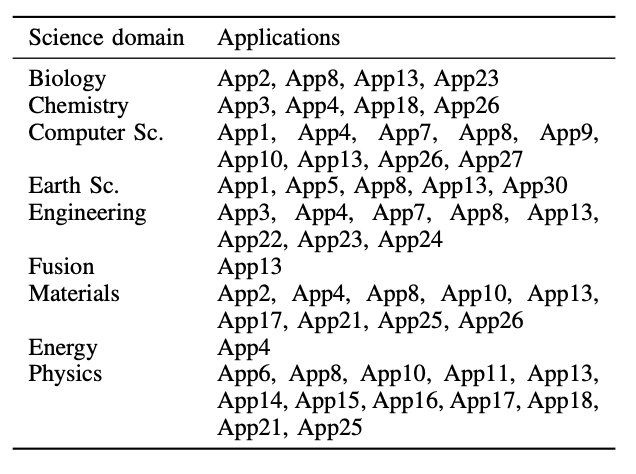

In [2]:
#imports
import pandas as pd
import os

## 1. Select desired application, we used `App11` (App11.parquet) as an example.

In [35]:

darshan_total_path = os.environ['darshan_total_path']
total_file= ( f"{darshan_total_path}App11.parquet" 
            )

df = pd.read_parquet(total_file)

## 2. We get the list of jobids and the start_time and other high-level informations for an application.

In [33]:

df.head()

,uid,jobid,start_time,end_time,darshan_log_version,exe,nprocs,runtime,total_BGQ_CSJOBID,total_BGQ_NNODES,...,total_STDIO_F_WRITE_START_TIMESTAMP,total_STDIO_F_READ_START_TIMESTAMP,total_STDIO_F_OPEN_END_TIMESTAMP,total_STDIO_F_CLOSE_END_TIMESTAMP,total_STDIO_F_WRITE_END_TIMESTAMP,total_STDIO_F_READ_END_TIMESTAMP,total_STDIO_F_FASTEST_RANK_TIME,total_STDIO_F_SLOWEST_RANK_TIME,total_STDIO_F_VARIANCE_RANK_TIME,total_STDIO_F_VARIANCE_RANK_BYTES
0,45847868f97554aaf56672aab3f644e9,3819766,1638885281,1638885603,3.21,b47175828c556fa8150d318f140e4050,6,323,NaN,NaN,...,0.004733,1.006361,322.217606,322.217673,322.215748,322.206105,0.0,0.0,0.0,0.0
0,45847868f97554aaf56672aab3f644e9,2158071,1638934117,1638934322,3.21,b47175828c556fa8150d318f140e4050,192,206,NaN,NaN,...,0.024097,1.245322,204.574377,204.574496,204.534181,203.210138,0.0,0.0,0.0,0.0
0,83ab0b13719ba7c929a84678b92ed5c0,3161340,1638855225,1638856413,3.21,b47175828c556fa8150d318f140e4050,192,1189,NaN,NaN,...,0.019517,1.288710,1188.103338,1187.868921,1188.109873,1187.824518,0.0,0.0,0.0,0.0
0,45847868f97554aaf56672aab3f644e9,515068,1638884153,1638884479,3.21,b47175828c556fa8150d318f140e4050,6,327,NaN,NaN,...,0.004951,1.001636,325.722795,325.722864,325.721031,325.709736,0.0,0.0,0.0,0.0
0,45847868f97554aaf56672aab3f644e9,3038388,1638886190,1638886481,3.21,b47175828c556fa8150d318f140e4050,6,292,NaN,NaN,...,0.004270,1.014513,291.317595,291.317663,291.315846,291.276241,0.0,0.0,0.0,0.0


## 3. `start_time` in the above dataframe can be converted into date-time format as below.

In [34]:

df['timestamp'] = pd.to_datetime(df['start_time'],unit='s')
df.loc[:,['jobid', 'timestamp', 'start_time']]

,jobid,timestamp,start_time
0,3819766,2021-12-07 13:54:41,1638885281
0,2158071,2021-12-08 03:28:37,1638934117
0,3161340,2021-12-07 05:33:45,1638855225
0,515068,2021-12-07 13:35:53,1638884153
0,3038388,2021-12-07 14:09:50,1638886190
...,...,...,...
0,1572967,2021-11-08 10:59:54,1636369194
0,1602981,2021-11-08 12:07:18,1636373238
0,1781329,2021-11-08 11:33:48,1636371228
0,914501,2021-11-18 08:29:37,1637224177


## 4. Get the detail data for jobid `3819766` executed on `2021-12-07` of application `App11` is:

In [7]:
darshan_detail_path = os.environ['darshan_detail_path']
darshan_detail_file = f"{darshan_detail_path}2021/12/7/3819766-0.parquet"
#Note: If there are multiple job steps in a job then they will be named as 
#      3819766-0.parquet, 3819766-1.parquet, 3819766-2.parquet and so on.
#      It is because Darshan creates a .darshan file for each job step.

In [10]:
df_detail = pd.read_parquet(darshan_detail_file)


,recordid,rank,uid,jobid,start_time,end_time,filename,fstype,mountpt,BGQ_CSJOBID,...,STDIO_F_WRITE_START_TIMESTAMP,STDIO_F_READ_START_TIMESTAMP,STDIO_F_OPEN_END_TIMESTAMP,STDIO_F_CLOSE_END_TIMESTAMP,STDIO_F_WRITE_END_TIMESTAMP,STDIO_F_READ_END_TIMESTAMP,STDIO_F_FASTEST_RANK_TIME,STDIO_F_SLOWEST_RANK_TIME,STDIO_F_VARIANCE_RANK_TIME,STDIO_F_VARIANCE_RANK_BYTES
0,1736779653387505008,0,45847868f97554aaf56672aab3f644e9,3819766,1638885281,1638885603,37a4089819f941bb66c4f09f6a4d584a,gpfs,/gpfs/alpine,NaN,...,124.636979,0.000000,322.085705,322.096914,322.096809,0.000000,0.0,0.0,0.0,0.0
1,1790005811875017446,0,45847868f97554aaf56672aab3f644e9,3819766,1638885281,1638885603,c2ac1f0e2aeabbd963614b417e95bd18,gpfs,/gpfs/alpine,NaN,...,71.278449,124.687159,71.278404,322.206592,316.995644,322.206105,0.0,0.0,0.0,0.0
2,2038110552419877239,0,45847868f97554aaf56672aab3f644e9,3819766,1638885281,1638885603,b80bf13de88f92e73b6b31550e327f4b,gpfs,/gpfs/alpine,NaN,...,35.691236,0.000000,35.691201,36.508986,36.508818,0.000000,0.0,0.0,0.0,0.0
3,2246096841656642425,0,45847868f97554aaf56672aab3f644e9,3819766,1638885281,1638885603,a58fce2bcca8faa390dcbcad12fd56df,gpfs,/gpfs/alpine,NaN,...,22.771202,0.000000,22.771174,22.834110,22.833974,0.000000,0.0,0.0,0.0,0.0
4,2294202103046223771,0,45847868f97554aaf56672aab3f644e9,3819766,1638885281,1638885603,65a78dfd440a5ad750229f0c12af0ee1,gpfs,/gpfs/alpine,NaN,...,0.004733,0.000000,0.004638,322.207073,322.206988,0.000000,0.0,0.0,0.0,0.0


## 5. The detail data for the job is:

In [11]:
df_detail.head()

,recordid,rank,uid,jobid,start_time,end_time,filename,fstype,mountpt,BGQ_CSJOBID,...,STDIO_F_WRITE_START_TIMESTAMP,STDIO_F_READ_START_TIMESTAMP,STDIO_F_OPEN_END_TIMESTAMP,STDIO_F_CLOSE_END_TIMESTAMP,STDIO_F_WRITE_END_TIMESTAMP,STDIO_F_READ_END_TIMESTAMP,STDIO_F_FASTEST_RANK_TIME,STDIO_F_SLOWEST_RANK_TIME,STDIO_F_VARIANCE_RANK_TIME,STDIO_F_VARIANCE_RANK_BYTES
0,1736779653387505008,0,45847868f97554aaf56672aab3f644e9,3819766,1638885281,1638885603,37a4089819f941bb66c4f09f6a4d584a,gpfs,/gpfs/alpine,NaN,...,124.636979,0.000000,322.085705,322.096914,322.096809,0.000000,0.0,0.0,0.0,0.0
1,1790005811875017446,0,45847868f97554aaf56672aab3f644e9,3819766,1638885281,1638885603,c2ac1f0e2aeabbd963614b417e95bd18,gpfs,/gpfs/alpine,NaN,...,71.278449,124.687159,71.278404,322.206592,316.995644,322.206105,0.0,0.0,0.0,0.0
2,2038110552419877239,0,45847868f97554aaf56672aab3f644e9,3819766,1638885281,1638885603,b80bf13de88f92e73b6b31550e327f4b,gpfs,/gpfs/alpine,NaN,...,35.691236,0.000000,35.691201,36.508986,36.508818,0.000000,0.0,0.0,0.0,0.0
3,2246096841656642425,0,45847868f97554aaf56672aab3f644e9,3819766,1638885281,1638885603,a58fce2bcca8faa390dcbcad12fd56df,gpfs,/gpfs/alpine,NaN,...,22.771202,0.000000,22.771174,22.834110,22.833974,0.000000,0.0,0.0,0.0,0.0
4,2294202103046223771,0,45847868f97554aaf56672aab3f644e9,3819766,1638885281,1638885603,65a78dfd440a5ad750229f0c12af0ee1,gpfs,/gpfs/alpine,NaN,...,0.004733,0.000000,0.004638,322.207073,322.206988,0.000000,0.0,0.0,0.0,0.0
